In [178]:
from pandas_datareader import data as web
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV as rcv
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values='NaN',strategy='mean')
import matplotlib.pyplot as plt
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.warn('Warning Message: 4', UserWarning)
%matplotlib inline

<ipython-input-178-086fa1909a15>:13: UserWarning: Warning Message: 4
  warnings.warn('Warning Message: 4', UserWarning)


In [372]:
df = web.DataReader('ETH-USD',data_source='yahoo' ,start='2015-08-06',end='2021-05-14')
df=df[['Open','High','Low','Close','Volume']]

In [373]:
len(df)

2104

In [374]:
df.index.duplicated()

array([False, False, False, ..., False, False, False])

In [375]:
df = df[~df.index.duplicated()]

In [376]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2015-08-06,2.831620,3.536610,2.521120,2.772120,1.643290e+05
2015-08-07,2.793760,2.798810,0.714725,0.753325,6.741880e+05
2015-08-08,0.706136,0.879810,0.629191,0.701897,5.321700e+05
2015-08-09,0.713989,0.729854,0.636546,0.708448,4.052830e+05
2015-08-10,0.708087,1.131410,0.663235,1.067860,1.463100e+06
...,...,...,...,...,...
2021-05-09,3924.413330,4197.473145,3684.451660,3952.293945,6.269179e+10
2021-05-10,3948.271973,4178.208984,3783.889404,4168.701172,5.267974e+10
2021-05-11,4174.635742,4362.350586,3785.848633,3785.848633,6.902338e+10


#Data Cleaning

In [377]:
df.isnull().values.any()

False

In [378]:
df['open']=df['Open'].shift(1)
df['high']=df['High'].shift(1)
df['low']=df['Low'].shift(1)
df['close']=df['Close'].shift(1)

In [379]:
df

,Open,High,Low,Close,Volume,open,high,low,close
Date,,,,,,,,,
2015-08-06,2.831620,3.536610,2.521120,2.772120,1.643290e+05,NaN,NaN,NaN,NaN
2015-08-07,2.793760,2.798810,0.714725,0.753325,6.741880e+05,2.831620,3.536610,2.521120,2.772120
2015-08-08,0.706136,0.879810,0.629191,0.701897,5.321700e+05,2.793760,2.798810,0.714725,0.753325
2015-08-09,0.713989,0.729854,0.636546,0.708448,4.052830e+05,0.706136,0.879810,0.629191,0.701897
2015-08-10,0.708087,1.131410,0.663235,1.067860,1.463100e+06,0.713989,0.729854,0.636546,0.708448
...,...,...,...,...,...,...,...,...,...
2021-05-09,3924.413330,4197.473145,3684.451660,3952.293945,6.269179e+10,3911.463135,3981.259033,3743.989014,3928.844727
2021-05-10,3948.271973,4178.208984,3783.889404,4168.701172,5.267974e+10,3924.413330,4197.473145,3684.451660,3952.293945
2021-05-11,4174.635742,4362.350586,3785.848633,3785.848633,6.902338e+10,3948.271973,4178.208984,3783.889404,4168.701172


In [380]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')


steps = [('imputation', imp), ('scaler',StandardScaler()), ('lasso',Lasso())]        

pipeline =Pipeline(steps)
  
parameters = {'lasso__alpha':np.arange(0.0001,10,.0001),'lasso__max_iter':np.random.uniform(100,100000,4)}


reg = rcv(pipeline, parameters,cv=5)

#we have used Lasso regression which uses L1 type of regularization. This is a type of machine learning model based on 
#regression analysis which is used to predict continuous data.

we used 5 fold cross-validation. In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data.

The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. Cross-validation combines (averages) measures of fit (prediction error) to derive a more accurate estimate of model prediction performance. 

#Splitting the data into test and train sets

In [381]:
X=df[['open','high','low','close']]
y =df['Close']

In [382]:
avg_err={}  #dictionary that holds the size of the train data set and its corresponding average prediction error.
avg_train_err={}

In [383]:
df

,Open,High,Low,Close,Volume,open,high,low,close
Date,,,,,,,,,
2015-08-06,2.831620,3.536610,2.521120,2.772120,1.643290e+05,NaN,NaN,NaN,NaN
2015-08-07,2.793760,2.798810,0.714725,0.753325,6.741880e+05,2.831620,3.536610,2.521120,2.772120
2015-08-08,0.706136,0.879810,0.629191,0.701897,5.321700e+05,2.793760,2.798810,0.714725,0.753325
2015-08-09,0.713989,0.729854,0.636546,0.708448,4.052830e+05,0.706136,0.879810,0.629191,0.701897
2015-08-10,0.708087,1.131410,0.663235,1.067860,1.463100e+06,0.713989,0.729854,0.636546,0.708448
...,...,...,...,...,...,...,...,...,...
2021-05-09,3924.413330,4197.473145,3684.451660,3952.293945,6.269179e+10,3911.463135,3981.259033,3743.989014,3928.844727
2021-05-10,3948.271973,4178.208984,3783.889404,4168.701172,5.267974e+10,3924.413330,4197.473145,3684.451660,3952.293945
2021-05-11,4174.635742,4362.350586,3785.848633,3785.848633,6.902338e+10,3948.271973,4178.208984,3783.889404,4168.701172


In [385]:
for t in np.arange(50,97,3):
    get_ipython().magic('reset_selective -f reg1')
    split = int(t*len(X)/100)
    reg.fit(X[:split],y[:split])
    best_alpha = reg.best_params_['lasso__alpha']
    best_iter= reg.best_params_['lasso__max_iter']
    reg1= Lasso(alpha=best_alpha,max_iter=best_iter)
    X=imp.fit_transform(X,y)
    reg1.fit(X[:split],y[:split])
    df['P_C_%i'%t]=0.
    df.iloc[:,df.columns.get_loc('P_C_%i'%t)]=reg1.predict(X[:])
    df['Error_%i'%t]= np.abs(df['P_C_%i'%t]-df['Close'])

    e =np.mean(df['Error_%i'%t][split:])
    train_e= np.mean(df['Error_%i'%t][:split])
    avg_err[t]=e
    avg_train_err[t]=train_e

In [386]:
Range =df['high'][split:]-df['low'][split:]
Range

Date
2021-01-29     95.439087
2021-01-30    136.741089
2021-01-31     73.870728
2021-02-01     90.414429
2021-02-02     99.488037
                 ...    
2021-05-09    237.270020
2021-05-10    513.021484
2021-05-11    394.319580
2021-05-12    576.501953
2021-05-14    483.156250
Length: 105, dtype: float64


Average Range of the Day: 168.88481910342261


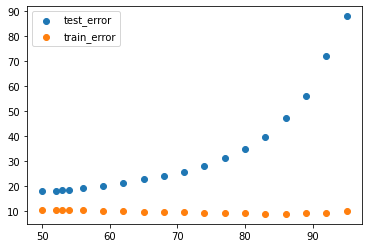

In [387]:
plt.scatter(list(avg_err.keys()),list(avg_err.values()), label='test_error')
plt.scatter(list(avg_train_err.keys()),list(avg_train_err.values()),label='train_error')
plt.legend(loc='best')
print ('\nAverage Range of the Day:',np.average(Range))

Conclusions :1. we can say that training error is less volatile than test error, therefore prediction would exhibit less volatility 

In [388]:
from pandas_datareader import data as web
import numpy as np
import pandas as pd
from sklearn import mixture as mix
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [389]:
df= web.get_data_yahoo('ETH-USD',start= '2015-08-06', end='2021-05-14')
df=df[['Open','High','Low','Close']]
df['open']=df['Open'].shift(1)
df['high']=df['High'].shift(1)
df['low']=df['Low'].shift(1)
df['close']=df['Close'].shift(1)

df=df[['open','high','low','close']]

In [390]:
df[df.index.duplicated()]

,open,high,low,close
Date,,,,
2016-03-27,10.431400,11.861300,10.407500,11.665600
2017-03-26,51.312099,52.460899,48.929798,49.666901
2018-03-25,524.286987,526.379028,470.440002,489.950989
2019-03-31,142.139221,142.189209,140.697372,141.514099
2020-03-29,131.015335,131.174088,125.450050,125.583733
2021-03-28,1691.263184,1837.187988,1683.716553,1819.684937


In [391]:
df = df[~df.index.duplicated()]

In [392]:
df

,open,high,low,close
Date,,,,
2015-08-06,NaN,NaN,NaN,NaN
2015-08-07,2.831620,3.536610,2.521120,2.772120
2015-08-08,2.793760,2.798810,0.714725,0.753325
2015-08-09,0.706136,0.879810,0.629191,0.701897
2015-08-10,0.713989,0.729854,0.636546,0.708448
...,...,...,...,...
2021-05-09,3911.463135,3981.259033,3743.989014,3928.844727
2021-05-10,3924.413330,4197.473145,3684.451660,3952.293945
2021-05-11,3948.271973,4178.208984,3783.889404,4168.701172


In [393]:
df=df.dropna()
df

,open,high,low,close
Date,,,,
2015-08-07,2.831620,3.536610,2.521120,2.772120
2015-08-08,2.793760,2.798810,0.714725,0.753325
2015-08-09,0.706136,0.879810,0.629191,0.701897
2015-08-10,0.713989,0.729854,0.636546,0.708448
2015-08-11,0.708087,1.131410,0.663235,1.067860
...,...,...,...,...
2021-05-09,3911.463135,3981.259033,3743.989014,3928.844727
2021-05-10,3924.413330,4197.473145,3684.451660,3952.293945
2021-05-11,3948.271973,4178.208984,3783.889404,4168.701172


In [394]:
unsup = mix.GaussianMixture(n_components=4, covariance_type="spherical", n_init=100, random_state=42)

In [395]:
unsup.fit(np.reshape(df,(-1,df.shape[1])))
regime = unsup.predict(np.reshape(df,(-1,df.shape[1])))

In [408]:
df['Return']= np.log(df['close']/df['close'].shift(1))

In [400]:
df

,open,high,low,close,Return
Date,,,,,
2015-08-07,2.831620,3.536610,2.521120,2.772120,NaN
2015-08-08,2.793760,2.798810,0.714725,0.753325,-1.302871
2015-08-09,0.706136,0.879810,0.629191,0.701897,-0.070710
2015-08-10,0.713989,0.729854,0.636546,0.708448,0.009290
2015-08-11,0.708087,1.131410,0.663235,1.067860,0.410335
...,...,...,...,...,...
2021-05-09,3911.463135,3981.259033,3743.989014,3928.844727,0.006690
2021-05-10,3924.413330,4197.473145,3684.451660,3952.293945,0.005951
2021-05-11,3948.271973,4178.208984,3783.889404,4168.701172,0.053308


In [402]:
df = df[~df.index.duplicated()]

In [403]:
df

,open,high,low,close,Return
Date,,,,,
2015-08-07,2.831620,3.536610,2.521120,2.772120,NaN
2015-08-08,2.793760,2.798810,0.714725,0.753325,-1.302871
2015-08-09,0.706136,0.879810,0.629191,0.701897,-0.070710
2015-08-10,0.713989,0.729854,0.636546,0.708448,0.009290
2015-08-11,0.708087,1.131410,0.663235,1.067860,0.410335
...,...,...,...,...,...
2021-05-09,3911.463135,3981.259033,3743.989014,3928.844727,0.006690
2021-05-10,3924.413330,4197.473145,3684.451660,3952.293945,0.005951
2021-05-11,3948.271973,4178.208984,3783.889404,4168.701172,0.053308


In [404]:
Regimes=pd.DataFrame(regime,columns=['Regime'],index=df.index)\
                     .join(df, how='inner')\
                          .assign(market_cu_return=df.Return.cumsum())\
                                 .reset_index(drop=False)\
                                             .rename(columns={'index':'Date'})

In [405]:
Regimes

,Date,Regime,open,high,low,close,Return,market_cu_return
0,2015-08-07,0,2.831620,3.536610,2.521120,2.772120,NaN,NaN
1,2015-08-08,0,2.793760,2.798810,0.714725,0.753325,-1.302871,-1.302871
2,2015-08-09,0,0.706136,0.879810,0.629191,0.701897,-0.070710,-1.373581
3,2015-08-10,0,0.713989,0.729854,0.636546,0.708448,0.009290,-1.364291
4,2015-08-11,0,0.708087,1.131410,0.663235,1.067860,0.410335,-0.953956
...,...,...,...,...,...,...,...,...
2092,2021-05-09,2,3911.463135,3981.259033,3743.989014,3928.844727,0.006690,7.256488
2093,2021-05-10,2,3924.413330,4197.473145,3684.451660,3952.293945,0.005951,7.262439
2094,2021-05-11,2,3948.271973,4178.208984,3783.889404,4168.701172,0.053308,7.315747
2095,2021-05-12,2,4174.635742,4362.350586,3785.848633,3785.848633,-0.096334,7.219413


In [406]:
Regimes.columns

Index(['Date', 'Regime', 'open', 'high', 'low', 'close', 'Return',
       'market_cu_return'],
      dtype='object')

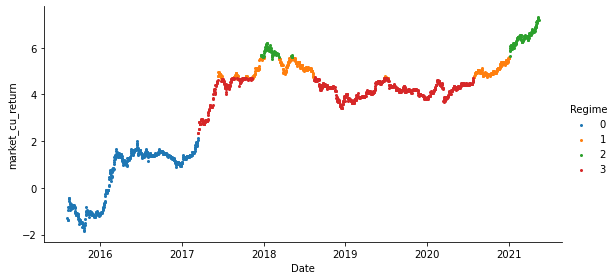

In [407]:
order=[0,1,2,3]
fig = sns.FacetGrid(data=Regimes,hue='Regime',hue_order=order,aspect=2,height= 4)
fig.map(plt.scatter,'Date','market_cu_return', s = 4).add_legend()
plt.show()

we can conclude a few things just by looking at the chart.

The red and yellow zone is the low volatility or the sideways zone
The purple zone is high volatility zone or panic zone.
The green zone is a breakout zone.
The blue zone: Not entirely sure but let us find out.

In [365]:
for i in order:
    print('Mean for regime %i: '%i,unsup.means_[i][0])
    print('Co-Variancefor regime %i: '%i,(unsup.covariances_[i]))

Mean for regime 0:  7.8594246965660055
Co-Variancefor regime 0:  26.689962981782386
Mean for regime 1:  465.751021998514
Co-Variancefor regime 1:  15394.82017788406
Mean for regime 2:  1542.1312577159715
Co-Variancefor regime 2:  520273.0006174481
Mean for regime 3:  188.1079059013803
Co-Variancefor regime 3:  4224.379275345047
